# TASKS

These are my Solutions to the tasks assessment.The Author is Stephen Gallagher G00314689@gmit.ie
***

##  🢂Task1:

October 5th, 2020: Write a Python function called sqrt2 that calculates and
prints to the screen the square root of 2 to 100 decimal places. Your code should
not depend on any module from the standard library1 or otherwise. You should
research the task first and include references and a description of your algorithm.

***
###  ⚪ Task: Calculate a Square Root


We can Calculate the square root of a number by using  Newtons method [1].

To find the square root z of a number x, we can iterate using the following equation.

$$ Z_{next}= z -\frac{z^2 - x} {2z} $$

References Below : 
[1] A tour of Go; Exercise: loops and functions; https://tour.goalang.org/flowcontrol/8
***

In [1]:
"""Function to calculate the square root of a number x.""" 
import math 

def sqrt(x):
    # Initial guess for the square root of z
    z = x / 2
    # Loop till happy with the accuracy
    while x -(z * z) > 0.001:
        # calculate a better guess for the square root.
        z-= (z * z - x ) / (2 * z )
        #return the approximate square root of x.
        return z

***


###  ⚪ Tests of the function: 

Below we test the function with known values.
While also importing math.

In [2]:
# test the function on 100. while importing math.
import math
math.sqrt(100)

10.0

In [3]:
# test the function on 2.
import math
math.sqrt(2)

1.4142135623730951

***



***
###  ⚪ Python tries to keep it simple:

This by keeping the number of digits manageable by displaying a rounded value.(In first equation below)

They even allow for the use of strings to format the output using strings as seen below.(In second equation below)

In [4]:
1 / 10


0.1

In [5]:
import math
format(math.pi, '.2f')   # give 2 digits after the point


'3.14'

***

***
###  ⚪ repr() function:

There are many different decimal numbers that share the same nearest approximate binary fraction.

The built-in repr() function would choose one.

This which helped as now python on most systems is now able to choose the shortest approximate binary fraction.


#### repr() function explained below:

repr(object)
Return a string containing a printable representation of an object. For many types, this function makes an attempt to return a string that would yield an object with the same value when passed to eval(), otherwise the representation is a string enclosed in angle brackets that contains the name of the type of the object together with additional information often including the name and address of the object. A class can control what this function returns for its instances by defining a __repr__() method.

***

***
###  ⚪ Python Has Tools to help Precision:

Python provides many tools that help when you want to know the exact value  for eg : of a float. 

The float.as_integer_ratio() method expresses the value of a float as a fraction.

### Definition below:

float.as_integer_ratio()
Return a pair of integers whose ratio is exactly equal to the original float and with a positive denominator.

As you can see below it clarifies that the tool works to give exact value stored by the computer and this helps when porting accross different virsions of python.

In [6]:
x = 3.14159
x.as_integer_ratio()

(3537115888337719, 1125899906842624)

In [7]:
 x == 3537115888337719 / 1125899906842624

True

***

###  ⚪ Using library to get to 100 decimal spaces:

Below is a method that can be used to get 100 decimal spaces using the librarys

In [8]:
from decimal import *
getcontext().prec = 100
Decimal(2).sqrt()

Decimal('1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573')

***
###  ⚪ Representation Error:

Representation error refers to decimal fractions being unable to be represented exactly as binary "base 2" fractions. This is the chief reason why for eg: Python, Perl, C, C++, Java, Fortran  won’t display the exact decimal number you expect.

***

***

###  ⚪ Problem:

with python trying to keep things manageable the number is never 100% accurate as they display a rounded number.
And yes the more the decimal places the more accurate the value but python prints out  0's at the end of its calculations and not to more than usually 17 characters 
  (0.3333333333333300000000000000) .so you cannot see it for eg 100 decimal places using the math library.




***
###  ⚪ How to perform square root without using math module in Python:

Python has exponentiation operator (**) which can be used to calculate power of a number. x**y returns x raised to y i.e. y times multiplication of x. Since we need to calculate square root, y should be (1/2)

In [9]:
10**(1/2)

3.1622776601683795

In [10]:
25**(1/2)

5.0

###  ⚪ Newton's method:

Newtons method is used to essentially take an initial number and find better approximations to the roots of a number. The process involves repeating the equation as many times as necessary to get a desired accuracy. Newtons method can be read further in link below in references.

###  ⚪ Solution: using non-library and library methods

In [11]:
x = 2 * 10 ** 200

r = x

def test_diffs(x, r):
    d0 = abs(x - r**2)
    dm = abs(x - (r-1)**2)
    dp = abs(x - (r+1)**2)
    minimised = d0 <= dm and d0 <= dp
    below_min = dp < dm
    return minimised, below_min

while True:
    oldr = r
    r = (r + x // r) // 2

    minimised, below_min = test_diffs(x, r)
    if minimised:
        break

    if r == oldr:
        if below_min:
            r += 1
        else:
            r -= 1
        minimised, _ = test_diffs(x, r)
        if minimised:
            break

print(f'{r // 10**100}.{r % 10**100:0100d}')

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [12]:
import decimal
decimal.getcontext().prec=101
Decimal("2").sqrt()

Decimal('1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727')

***

###  ⚪ Non-library Solution (Explained):

As seen above demonstrated the way of getting the square root of 2 to 100 decimal places .This method where we used Pythons exponentiation operator (**).Which is used to calculate the power of a number.This which we used to get the result of the square root 2 to about 100 places,then formatted the result by using a formatted print statement.This giving the output of the square root of 2 to 100 decimal places . 

***
###  ⚪ REFERENCES FOR TASK 1 :

https://www.tutorialspoint.com/How-to-perform-square-root-without-using-math-module-in-Python

https://stackoverflow.com/questions/46183020/square-root-without-pre-defined-function-in-python

https://stackoverflow.com/questions/24362686/how-to-print-out-100-decimal-places-of-sqrt2

https://en.wikipedia.org/wiki/Newton%27s_method

***
##  🢂 Task 2:

***
TASK : November 2nd, 2020: The Chi-squared test for independence is a statistical
hypothesis test like a t-test. It is used to analyse whether two categorical variables
are independent. The Wikipedia article below gives the table below as an example,
stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats
to verify this value and calculate the associated p value. You should include a short
note with references justifying your analysis in a markdown cell.

![](task2.png)

###  ⚪ scipy.stats.chi2_contingency Explained:

This function computes the chi-square statistic and p-value for the hypothesis test of independence of observed frequencies in a contingency table. The expected frequencies are computed based on the marginal sums under the assumption of independence.

###  ⚪ chi-squared uses:

used to compare two catagorical variables , gender , car colour , car make, do you smoke (yes or no)



***
###  ⚪Solution: chi-squared test to prove value 24.6 is aprox accurate, and calculate pValue

Data set taken, then reproduced the result as was done by person in wikipedia article as seen below:

In [13]:
import scipy.stats as stats

categories = [[90,60,104,95,349]],[[30,50,51,20,151]],[[30,40,45,35,150]]

chi2,pValue,dof,exp = stats.chi2_contingency(categories)

print(pValue)
print(chi2)

0.0018369908954651245
24.5712028585826


###  ⚪REFERENCES FOR TASK 2 :

https://www.youtube.com/watch?v=N34vryUA3Y8&ab_channel=FPSCPPSCOFFICIALdoctor

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

***
## 🢂 Task 3:

TASK:
November 16th, 2020: The standard deviation of an array of numbers x is
calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) .
However, Microsoft Excel has two different versions of the standard deviation
calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above
calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . Research these Excel functions, writing a note in a Markdown cell
about the difference between them. Then use numpy to perform a simulation
demonstrating that the STDEV.S calculation is a better estimate for the standard
deviation of a population when performed on a sample. Note that part of this task
is to figure out the terminology in the previous sentence.

###  ⚪ Differences in functions STDEV.P & STDEV.S :

- The STDEV. P function is used when your data represents the entire population.        ( P for population )
- The STDEV. S function is used when your data is a sample of the entire population. ( S for sample )

The two different version calculations:
- In STDEV.P function, the squared deviation is divided by the total number of arguments, mostly represented as N.
- In STDEV.S or STDEV, the squared deviation is divided by the total number of sample -1. It is represented as N-1.

###  ⚪ why we divide by N-1 for standard deviation :

The reason we divide by n-1 is that it corrects the bias  because we are using the sample mean, instead of the population mean, to calculate the variance. Since the sample mean is based on the data, it will get drawn toward the center of mass for the data.

###  ⚪ why simplified : 

(n-1) is called the degrees of freedom and if we use n the estimator will be unbiased

###  ⚪ Thoughts:

According to most people the sample is more accurate because it takes random data from the dataset. You could have several values very high and some low and middle which makes the result not a valid indicator

###  ⚪ Example on a Set in Excel:

STDEV.P :

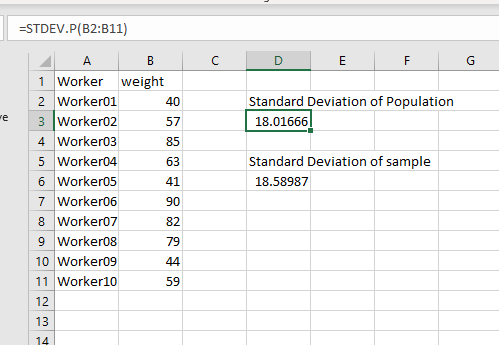

STDEV.S :

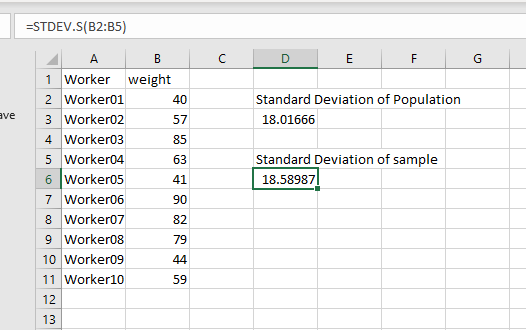

###  ⚪ Example in Python :
 - top calculation using PSTDEV (using entire population)
 - bottom calculation using STDEV (using sample of population)

In [14]:
import statistics

statistics.pstdev([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])
2.4000000000000004

statistics.stdev([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])
2.5298221281347035

2.5298221281347035

###  ⚪ REFERENCES FOR TASK 3 :

https://www.google.com/search?q=why+does+STDEV.S+devide+by+len(x)-1&rlz=1C1GCEU_en-GBIE924IE924&oq=why+does+STDEV.S+devide+by+len(x)-1&aqs=chrome..69i57.52089j0j7&sourceid=chrome&ie=UTF-8

https://www.researchgate.net/post/Why-divide-by-n-1-when-estimating-standard-deviation

https://stackabuse.com/calculating-variance-and-standard-deviation-in-python/


***
## 🢂 Task 4 :

November 30th, 2020: NB – when I first posted this task, I accidentally
wrote “k-means” where I meant to write “kNN” for k Nearest Neighbours.
Because of this, I will allow either algorithm to be used and have
extended the deadline by two weeks. Use scikit-learn to apply k-means
clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data
set online. Explain in a Markdown cell how your code works and how accurate it
might be, and then explain how your model could be used to make predictions of
species of iris.

###  ⚪ The Iris flower data set :

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus". Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

###  ⚪ CLUSTERING :

- It is a way that allows us to get a group set of objects with similar features 
- it can help you find meaningfull attributes among your set of data or group together your data a
- It can also discover underlying patterns

###  ⚪ ADVANTAGES & DISADVANTAGES TO K-MEANS CLUSTERING :

K-Means Advantages :

-  If variables are huge, then  K-Means most of the times computationally faster than hierarchical clustering, if we keep k  smalls.

-  K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are globular.

K-Means Disadvantages :

-  Difficult to predict K-Value.
-  With global cluster, it didn't work well.
-  Different initial partitions can result in different final clusters.
-  It does not work well with clusters (in the original data) of Different size and Different density

###  ⚪ K-means method being the most common Cluster algorithm used: Steps below:

- Pick a value for k (the number of clusters to create)
- Initialize k ‘centroids’ (starting points) in your data
- Create your clusters. Assign each point to the nearest centroid.
- Make your clusters better. Move each centroid to the center of its cluster.
- Repeat steps 3–4 until your centroids converge.

###  ⚪ How to apply K-means clustering  using Iris data Set of scikit learn :

#### import the following libraries

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

#### Load the data

In [16]:
iris = datasets.load_iris()

#### Define your target and predictors.

In [17]:
X = iris.data[:, :2]
y = iris.target

 #### data through a scatter plot.

Text(0, 0.5, 'Sepal Width')

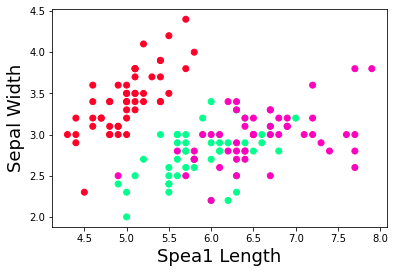

In [18]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

#### instantiate and fit our K means cluster model using three clusters and a random state of 21 :

In [19]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

C:\Users\StephenG24\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=21)

#### identify the center points of the data

In [20]:
centers = km.cluster_centers_
print(centers)
Output
[[5.77358491 2.69245283]
[5.006      3.418    ]
[6.81276596 3.07446809]]

SyntaxError: invalid syntax (<ipython-input-20-9abec5e95f00>, line 4)

#### compare our original data versus our clustered results

In [ ]:
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

### ⚪ REFERENCES FOR TASK 4 :

https://en.wikipedia.org/wiki/Iris_flower_data_set

https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

http://playwidtech.blogspot.com/2013/02/k-means-clustering-advantages-and.html#:~:text=K%2DMeans%20Advantages%20%3A,Difficult%20to%20predict%20K%2DValue.

#### ** End Cell **